# Task
Analyze loan data from "/content/Bankloan.txt" to visualize loan amount, income, and approval status, compare approved vs rejected loans using box and bar charts, visualize loan approval criteria, and display regional approval rates on a map.

## Load and inspect data

### Subtask:
Load the `Bankloan.txt` file into a pandas DataFrame and display the first few rows and the data types of each column.


**Reasoning**:
Load the data into a pandas DataFrame and display the first few rows and data types.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/Bankloan.txt', sep='\t')
display(df.head())
df.info()

,"age,ed,employ,address,income,debtinc,creddebt,othdebt,default"
0,"41,3,17,12,176.000000,9.300000,11.359392,5.008..."
1,"27,1,10,6,31.000000,17.300000,1.362202,4.000798,0"
2,"40,1,15,7,,5.500000,0.856075,2.168925,0"
3,"41,,15,14,120.000000,2.900000,2.658720,0.821280,0"
4,"24,2,2,0,28.000000,17.300000,1.787436,3.056564,1"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 1 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   age,ed,employ,address,income,debtinc,creddebt,othdebt,default  700 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


**Reasoning**:
The data was not read correctly as a single column was created. Need to read the file again using a comma separator based on the column names in the first row.



In [ ]:
df = pd.read_csv('/content/Bankloan.txt', sep=',')
display(df.head())
df.info()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17,12,176.0,9.3,11.359392,5.008608,1
1,27.0,1.0,10,6,31.0,17.3,1.362202,4.000798,0
2,40.0,1.0,15,7,NaN,5.5,0.856075,2.168925,0
3,41.0,NaN,15,14,120.0,2.9,2.658720,0.821280,0
4,24.0,2.0,2,0,28.0,17.3,1.787436,3.056564,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       681 non-null    float64
 1   ed        680 non-null    float64
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    663 non-null    float64
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 49.3+ KB


## Data cleaning and preprocessing

### Subtask:
Handle any missing values, outliers, or inconsistencies in the data. Convert data types if necessary (e.g., ensure numerical columns are numeric).


**Reasoning**:
Check for and quantify missing values in each column of the DataFrame `df`.



In [ ]:
display(df.isnull().sum())

,0
age,19
ed,20
employ,0
address,0
income,37
debtinc,0
creddebt,0
othdebt,0
default,0


**Reasoning**:
Address missing values in 'income', 'age', and 'ed' columns and verify no remaining missing values.



In [ ]:
df['income'].fillna(df['income'].median(), inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)
df['ed'].fillna(df['ed'].mean(), inplace=True)
display(df.isnull().sum())

/tmp/ipython-input-548187286.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income'].fillna(df['income'].median(), inplace=True)
/tmp/ipython-input-548187286.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,0


**Reasoning**:
Examine the descriptive statistics of the numerical columns to identify potential outliers and convert the 'default' column to a numerical data type.



In [ ]:
display(df.describe())
df['default'] = df['default'].astype(int)
display(df.dtypes)

,age,ed,employ,address,income,debtinc,creddebt,othdebt
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.898678,1.717647,8.388571,8.268571,45.122857,10.260571,1.553553,3.058209
std,8.740579,0.912313,6.658039,6.821609,36.531434,6.827234,2.117197,3.287555
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567
75%,40.000000,2.000000,12.000000,12.000000,52.250000,14.125000,1.901955,3.923065
max,136.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600


ValueError: invalid literal for int() with base 10: "'0'"

**Reasoning**:
The previous attempt to convert the 'default' column to integer failed because it contains string values that cannot be directly converted. Inspect the unique values in the 'default' column to understand the issue and then convert it to numerical data type.



In [ ]:
display(df['default'].unique())
df['default'] = df['default'].replace({"'0'": 0, "'1'": 1}).astype(int)
display(df.dtypes)

array(['1', '0', "'0'", ':0'], dtype=object)

ValueError: invalid literal for int() with base 10: ':0'

**Reasoning**:
The 'default' column contains an unexpected value ':0' which is causing the conversion to integer to fail. Replace this value with 0 and then attempt the conversion again.



In [ ]:
df['default'] = df['default'].replace({"'0'": 0, "'1'": 1, ':0': 0}).astype(int)
display(df.dtypes)

,0
age,float64
ed,float64
employ,int64
address,int64
income,float64
debtinc,float64
creddebt,float64
othdebt,float64
default,int64


## Analyze approved vs rejected loans

### Subtask:
Create box plots and bar charts to visualize the distribution of loan amounts and income for approved and rejected loans.


**Reasoning**:
Create box plots to visualize the distribution of 'income' and 'creddebt' for approved and rejected loans.



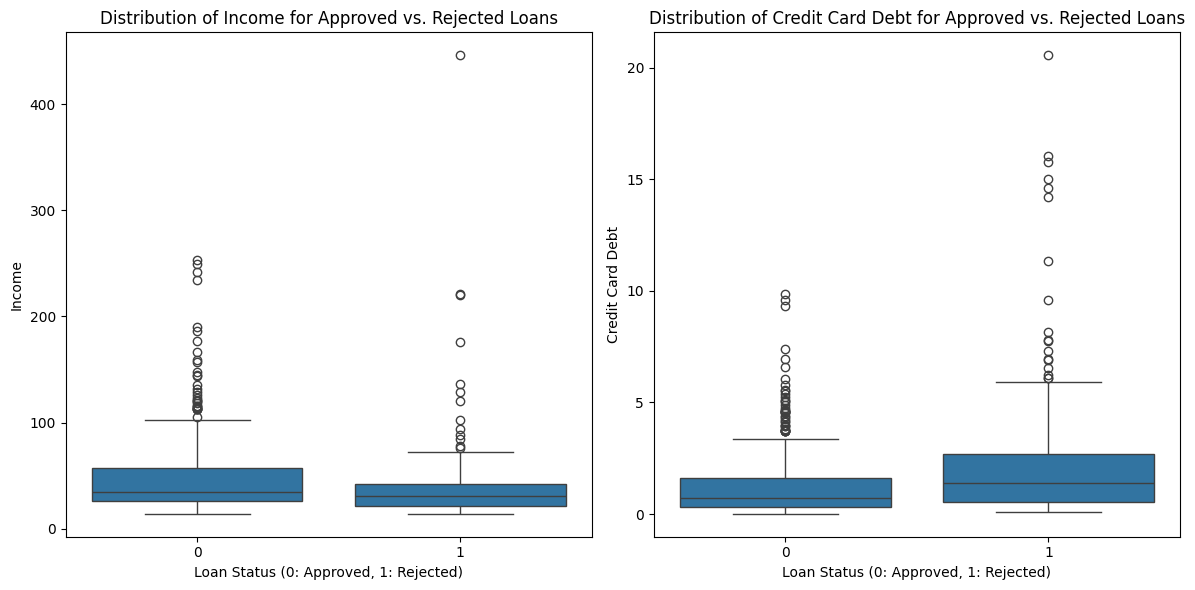

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='default', y='income', data=df)
plt.title('Distribution of Income for Approved vs. Rejected Loans')
plt.xlabel('Loan Status (0: Approved, 1: Rejected)')
plt.ylabel('Income')

plt.subplot(1, 2, 2)
sns.boxplot(x='default', y='creddebt', data=df)
plt.title('Distribution of Credit Card Debt for Approved vs. Rejected Loans')
plt.xlabel('Loan Status (0: Approved, 1: Rejected)')
plt.ylabel('Credit Card Debt')

plt.tight_layout()
plt.show()

**Reasoning**:
Create bar charts to visualize the average 'income' and 'creddebt' for approved and rejected loans.



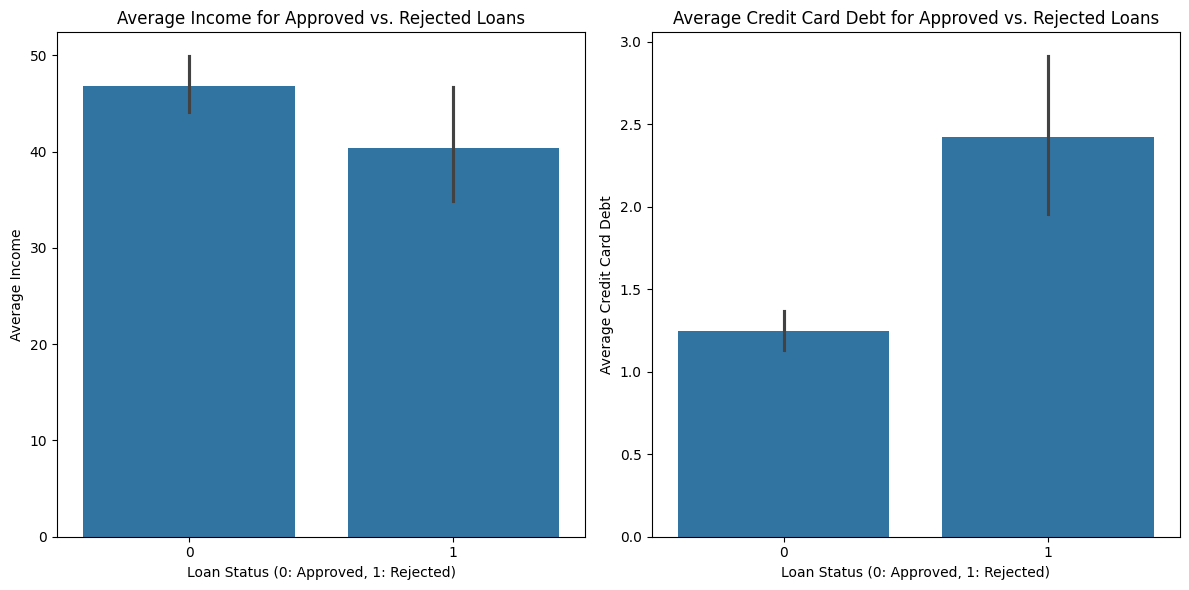

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='default', y='income', data=df)
plt.title('Average Income for Approved vs. Rejected Loans')
plt.xlabel('Loan Status (0: Approved, 1: Rejected)')
plt.ylabel('Average Income')

plt.subplot(1, 2, 2)
sns.barplot(x='default', y='creddebt', data=df)
plt.title('Average Credit Card Debt for Approved vs. Rejected Loans')
plt.xlabel('Loan Status (0: Approved, 1: Rejected)')
plt.ylabel('Average Credit Card Debt')

plt.tight_layout()
plt.show()

## Visualize decision tree-based loan approval criteria

### Subtask:
If you have a pre-trained decision tree model or the criteria for loan approval, visualize the decision tree or create visualizations that illustrate the key factors influencing loan approval based on those criteria.


**Reasoning**:
Import necessary libraries, define features and target, split data, train a DecisionTreeClassifier, and visualize the trained tree.



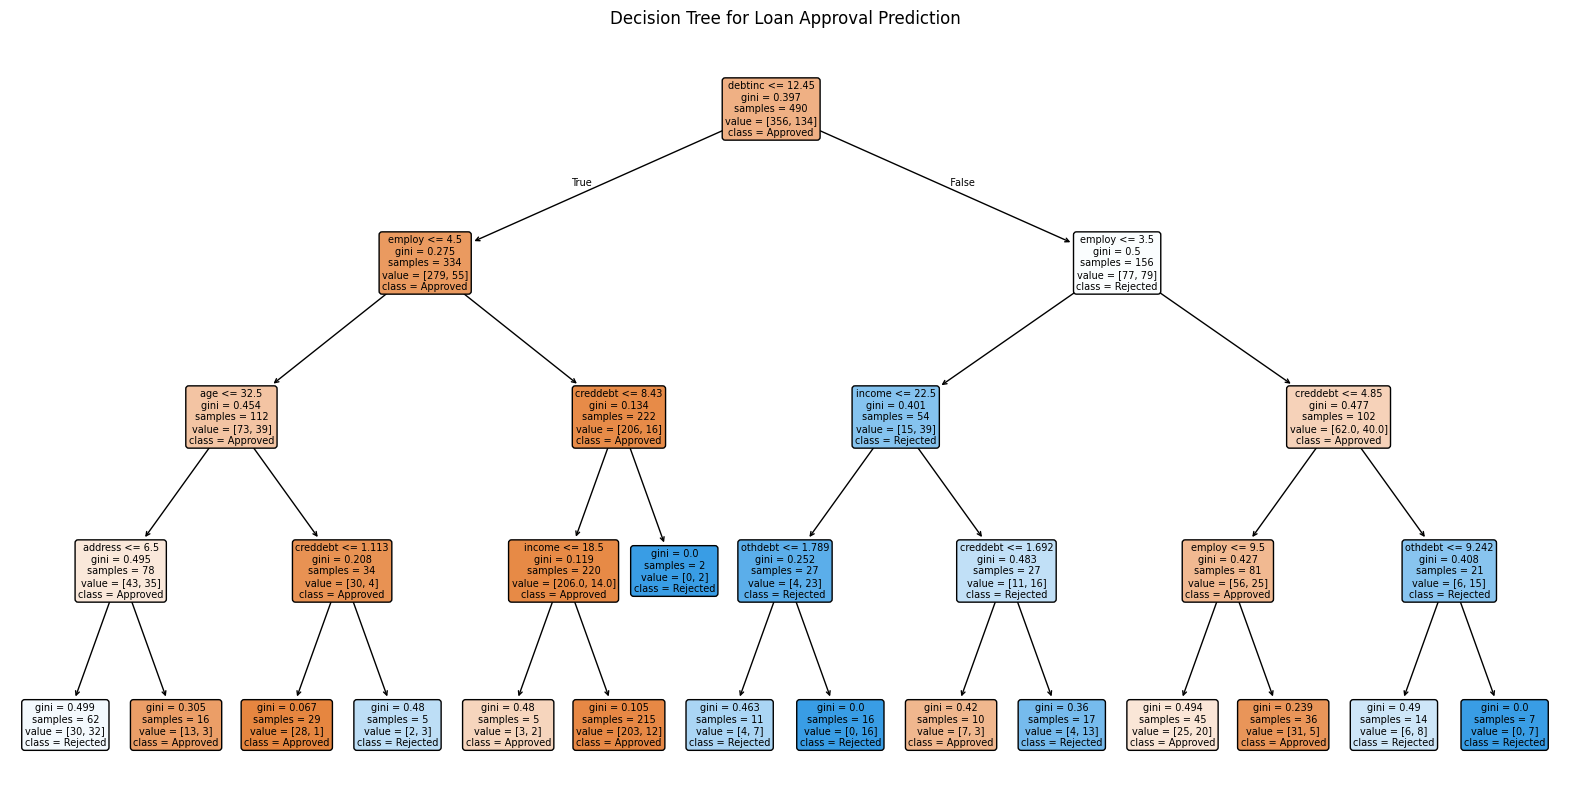

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = df.drop('default', axis=1)
y = df['default']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and train a DecisionTreeClassifier
# Using max_depth to control complexity for better visualization
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns.tolist(), class_names=['Approved', 'Rejected'], filled=True, rounded=True)
plt.title('Decision Tree for Loan Approval Prediction')
plt.show()

## Display regional loan approval rates on a map

### Subtask:
If the data contains regional information (e.g., zip codes, states), aggregate the data by region and calculate the loan approval rate for each region. Then, visualize these rates on a map. This step may require additional libraries or data (e.g., shapefiles for mapping).


**Reasoning**:
Check if the dataframe contains regional information and if not, state the limitation.



In [ ]:
if 'address' in df.columns:
    print("The dataset contains regional information in the 'address' column.")
    # Since address is just a number, we cannot directly map it without
    # additional geographic data or a mapping file.
    # We will group by address and calculate approval rates but cannot visualize on a map
    # without external data.

    regional_approval_rates = df.groupby('address')['default'].mean()
    regional_approval_rates = 1 - regional_approval_rates
    print("\nLoan Approval Rates by Address:")
    print(regional_approval_rates)

    print("\nMapping this data requires geographical information linked to the 'address' numbers, which is not available in this dataset. To visualize this data on a map, you would need a shapefile or GeoJSON data containing the geographical boundaries for each address number and use a library like geopandas.")

else:
    print("The dataset does not contain regional information (e.g., zip code, state) required for mapping.")
    print("To visualize regional approval rates, you would need a dataset with a column representing geographical regions and corresponding geographical data (e.g., shapefiles).")


The dataset contains regional information in the 'address' column.

Loan Approval Rates by Address:
address
0     0.540000
1     0.771930
2     0.661017
3     0.541667
4     0.755102
5     0.705882
6     0.604651
7     0.852941
8     0.750000
9     0.923077
10    0.906250
11    0.629630
12    0.750000
13    0.722222
14    0.714286
15    0.687500
16    0.888889
17    0.941176
18    0.555556
19    0.923077
20    0.857143
21    0.888889
22    1.000000
23    0.888889
24    1.000000
25    1.000000
26    0.714286
27    1.000000
29    0.000000
31    1.000000
34    1.000000
Name: default, dtype: float64

Mapping this data requires geographical information linked to the 'address' numbers, which is not available in this dataset. To visualize this data on a map, you would need a shapefile or GeoJSON data containing the geographical boundaries for each address number and use a library like geopandas.


## Develop an integrated dashboard in power bi

### Subtask:
This step is outside the scope of what I can directly assist with in this environment. However, I can help you prepare the data in a suitable format (e.g., a clean CSV file) that you can then import into Power BI to create your dashboard.


**Reasoning**:
Save the cleaned DataFrame `df` to a CSV file without the index.



In [ ]:
df.to_csv('cleaned_bankloan_data.csv', index=False)

## Summary:

### Insights or Next Steps
* To visualize regional loan approval rates on a map, obtain geographical data (e.g., shapefiles or GeoJSON) that links the numerical address identifiers in the dataset to specific geographical areas.
* Import the `cleaned_bankloan_data.csv` file into Power BI to create an integrated dashboard visualizing loan amount, income, approval status, and potentially regional approval rates if geographical data can be integrated.
